In [1]:
# Galaxy Cluster Dynamical Mass Estimation - Using 3-Sigma Redshift Clipping

In [2]:
# Step 1: Importing all the necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.constants import G, c, M_sun
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u

In [3]:
# Step 2: Read the data from the CSV file

df_all = pd.read_csv("cluster_data.csv")
print(df_all)

            objid         ra        dec    photoz  photozerr     specz  \
0    1.237670e+18  257.82458  64.133257  0.079193   0.022867  0.082447   
1    1.237670e+18  257.82458  64.133257  0.079193   0.022867  0.082466   
2    1.237670e+18  257.83332  64.126043  0.091507   0.014511  0.081218   
3    1.237670e+18  257.85137  64.173247  0.081102   0.009898  0.079561   
4    1.237670e+18  257.85137  64.173247  0.081102   0.009898  0.079568   
..            ...        ...        ...       ...        ...       ...   
134  1.237670e+18  258.44994  64.025909  0.081894   0.013624  0.071802   
135  1.237670e+18  258.43205  64.123685  0.077184   0.010523  0.080790   
136  1.237670e+18  258.46676  64.119499  0.088762   0.016934  0.082876   
137  1.237670e+18  258.48871  64.111343  0.079721   0.009565  0.080899   
138  1.237670e+18  258.48871  64.111343  0.079721   0.009565  0.080896   

     speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0    0.000017  8.347733  18.96488 

In [4]:
# Filter only unique values on the basis of (ra, dec) pair
# after filtering, the number of galaxies is reduced from 139 to 92
df = df_all.groupby(['ra', 'dec'], as_index=False).first()
print(df)

           ra        dec         objid    photoz  photozerr     specz  \
0   257.77059  64.052263  1.237670e+18  0.080604   0.008769  0.082729   
1   257.78072  64.082540  1.237670e+18  0.098597   0.014564  0.082739   
2   257.82458  64.133257  1.237670e+18  0.079193   0.022867  0.082447   
3   257.83332  64.126043  1.237670e+18  0.091507   0.014511  0.081218   
4   257.85137  64.173247  1.237670e+18  0.081102   0.009898  0.079561   
..        ...        ...           ...       ...        ...       ...   
87  258.44994  64.025909  1.237670e+18  0.081894   0.013624  0.071807   
88  258.45078  64.020363  1.237670e+18  0.085335   0.009769  0.082060   
89  258.45092  64.147217  1.237670e+18  0.102862   0.012422  0.095329   
90  258.46676  64.119499  1.237670e+18  0.088762   0.016934  0.082876   
91  258.48871  64.111343  1.237670e+18  0.079721   0.009565  0.080899   

    speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0   0.000021  9.716836  19.63080  0.046459  17.

In [5]:
print(df.columns)

Index(['ra', 'dec', 'objid', 'photoz', 'photozerr', 'specz', 'speczerr',
       'proj_sep', 'umag', 'umagerr', 'gmag', 'gmagerr', 'rmag', 'rmagerr',
       'obj_type'],
      dtype='object')


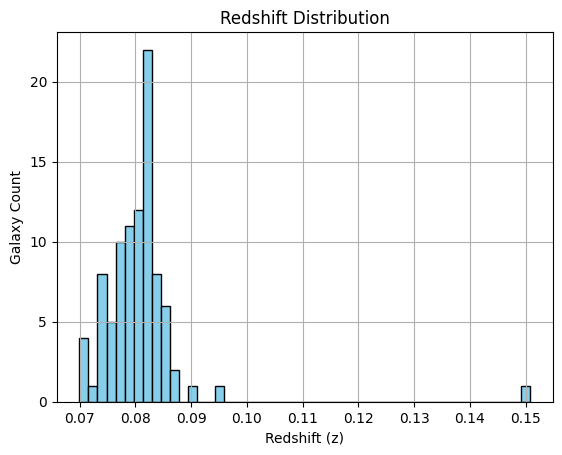

In [6]:
# Here is a bar graph to demonstrate the relation between the number of galaxies with a particular redshift

plt.hist(df['specz'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Redshift (z)')
plt.ylabel('Galaxy Count')
plt.title('Redshift Distribution')
plt.grid(True)
plt.show()


In [7]:
# Step 3: Filter Valid Redshifts (remove NaNs or invalid values)

specz_all = df['specz'].dropna()

In [8]:
# Step 4: Use 3-Sigma Clipping to Select Cluster Members
# 3-Sigma method is used to clip away the values of a dataset 
# which are farther than the range of +- 3*(standard deviation)
# from the mean of the dataset

# Here we find out the mean, standard deviation and the lower and 
# upper limit of the 3-Sigma cut based on redshift dispersion

specz_mean = specz_all.mean()
specz_std = specz_all.std()
specz_min = specz_mean - 3 * specz_std
specz_max = specz_mean + 3 * specz_std
print(f"Mean: {specz_mean:.5f}")
print(f"Standard Deviation: {specz_std:.5f}")
print(f"Lower Limit of redshift: {specz_min:.5f}")
print(f"Upper Limit of redshift: {specz_max:.5f}")

Mean: 0.08083
Standard Deviation: 0.00858
Lower Limit of redshift: 0.05511
Upper Limit of redshift: 0.10656


In [9]:
# Step 5: Finally we trim our dataset based on the 
# above logic and are left with 91 galaxies as shown

cluster_members = df[(df['specz'] >= specz_min) & (df['specz'] <= specz_max)]
print(cluster_members)

           ra        dec         objid    photoz  photozerr     specz  \
0   257.77059  64.052263  1.237670e+18  0.080604   0.008769  0.082729   
1   257.78072  64.082540  1.237670e+18  0.098597   0.014564  0.082739   
2   257.82458  64.133257  1.237670e+18  0.079193   0.022867  0.082447   
3   257.83332  64.126043  1.237670e+18  0.091507   0.014511  0.081218   
4   257.85137  64.173247  1.237670e+18  0.081102   0.009898  0.079561   
..        ...        ...           ...       ...        ...       ...   
87  258.44994  64.025909  1.237670e+18  0.081894   0.013624  0.071807   
88  258.45078  64.020363  1.237670e+18  0.085335   0.009769  0.082060   
89  258.45092  64.147217  1.237670e+18  0.102862   0.012422  0.095329   
90  258.46676  64.119499  1.237670e+18  0.088762   0.016934  0.082876   
91  258.48871  64.111343  1.237670e+18  0.079721   0.009565  0.080899   

    speczerr  proj_sep      umag   umagerr      gmag   gmagerr      rmag  \
0   0.000021  9.716836  19.63080  0.046459  17.

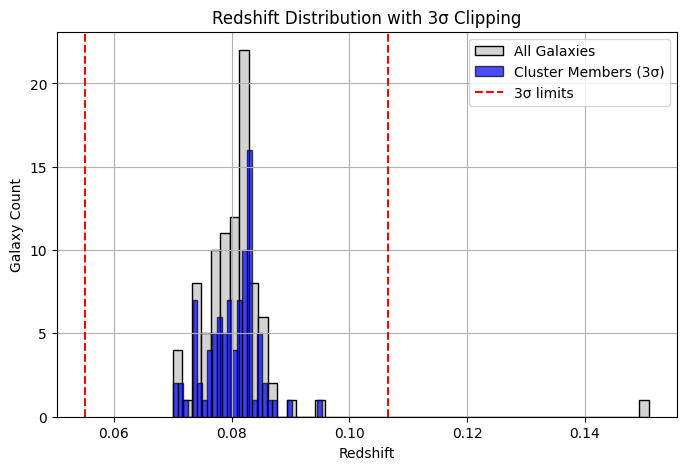

In [10]:
# Step 6: Plot Redshift Histogram with 3-Sigma Limits

plt.figure(figsize=(8, 5))
plt.hist(df['specz'], bins=50, color='lightgray', edgecolor='black', label='All Galaxies')
plt.hist(cluster_members['specz'], bins=30, color='blue', edgecolor='black', alpha=0.7, label='Cluster Members (3σ)')
plt.axvline(specz_min, color='red', linestyle='--', label='3σ limits')
plt.axvline(specz_max, color='red', linestyle='--')
plt.xlabel('Redshift')
plt.ylabel('Galaxy Count')
plt.title('Redshift Distribution with 3σ Clipping')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Step 7: Computing Cluster Redshift and Velocity Dispersion

specz_cluster = cluster_members['specz'].mean()
velocities = cluster_members['specz'] * c.to('km/s').value
v_mean = velocities.mean()
sigma_v = velocities.std()

print(f"Cluster redshift: {specz_cluster:.5f}")
print(f"Mean velocity: {v_mean:.2f} km/s")
print(f"Velocity dispersion (σ): {sigma_v:.2f} km/s")

Cluster redshift: 0.08006
Mean velocity: 24002.52 km/s
Velocity dispersion (σ): 1316.19 km/s


In [12]:
# Step 8: Estimate Cluster Size (Projected Radius in Mpc)

theta_arcmin = cluster_members['proj_sep'].median()
theta_rad = theta_arcmin * (np.pi / 180 / 60)  # convert to radians

H0 = 70  # Hubble constant in km/s/Mpc

D_A = (c.to('km/s').value / H0) * (specz_cluster / (1 + specz_cluster))  # angular diameter distance

R_proj = theta_rad * D_A  # projected radius in Mpc

print(f"Projected cluster radius: {R_proj:.2f} Mpc")

Projected cluster radius: 0.58 Mpc


In [13]:
print(G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [14]:
# Step 9: Calculating Dynamical Mass using Virial Theorem

G_km_Mpc = G.to('km3 / (kg s2)', equivalencies=u.dimensionless_angles()) / u.Mpc.to('km')  # Mpc in km
M_dyn_kg = (3 * sigma_v**2 * R_proj) / G_km_Mpc
M_dyn_solar = M_dyn_kg / M_sun.value

print(f"Estimated dynamical mass: {M_dyn_solar:.2e} M_sun")

Estimated dynamical mass: 7.06e+14 s2 kg / km3 M_sun


In [15]:
# Step 10: Compare with Luminous Mass (Approximation)

# The approximate luminous mass of our milky way galaxy is 6x10^10 M_sun
# Hence multiplying it with the number of galaxies in our dataset we 
# get the approximate luminous mass
approx_luminous_mass = 6*1e10 * len(cluster_members)

print(f"Approximate luminous mass: {approx_luminous_mass:.2e} M_sun")
print(f"Dark matter fraction: {(M_dyn_solar.value - approx_luminous_mass) / M_dyn_solar.value:.2%}")

Approximate luminous mass: 5.46e+12 M_sun
Dark matter fraction: 99.23%


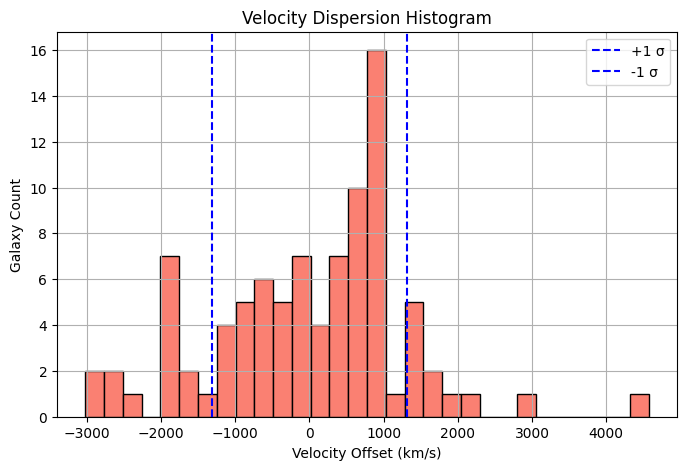

In [16]:
# Velocity Offset Plot

velocity_offsets = velocities - v_mean
plt.figure(figsize=(8, 5))
plt.hist(velocity_offsets, bins=30, color='salmon', edgecolor='black')
plt.axvline(x=sigma_v, color='blue', linestyle='--', label='+1 σ')
plt.axvline(x=-sigma_v, color='blue', linestyle='--', label='-1 σ')
plt.xlabel('Velocity Offset (km/s)')
plt.ylabel('Galaxy Count')
plt.title('Velocity Dispersion Histogram')
plt.legend()
plt.grid(True)
plt.show()

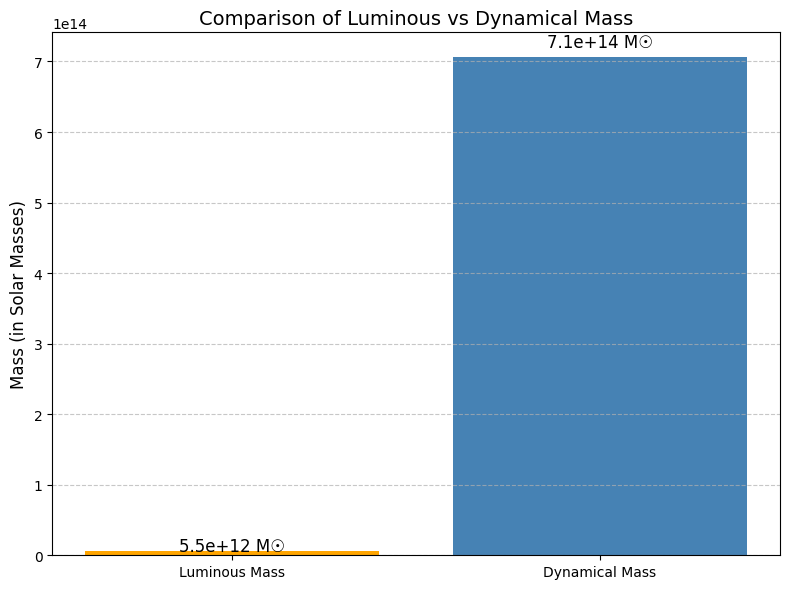

In [17]:
# Plot to visualize the inconsistency between dynamical mass and luminous mass

approx_luminous_mass = 5.46e+12
M_dyn_solar = 7.06e+14
labels = ['Luminous Mass', 'Dynamical Mass']
values = [approx_luminous_mass, M_dyn_solar]
colors = ['orange', 'steelblue']

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, values, color=colors)

# Annotate bars with mass values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval * 1.02, f'{yval:.1e} M☉', ha='center', fontsize=12)

# Labels and title
plt.ylabel('Mass (in Solar Masses)', fontsize=12)
plt.title('Comparison of Luminous vs Dynamical Mass', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [36]:
# The estimated dynamical mass of the cluster is ∼7×10^14 M_sun, 
# while the total luminous mass, assuming ∼6x10^10 M_sun per galaxy,
# totals only ~5.5x10^12 M_sun. This reveals that the luminous matter
# accounts for only about ~0.77% of the total mass. The remaining
# 99.23% must be attributed to dark matter, indicating a strong
# inconsistency between visible and total mass. This is consistent
# with modern understanding of galaxy clusters, which are typically 
# dark matter dominated systems